In [ ]:
!pip install replicate
!pip install langchain_community

In [ ]:
from google.colab import userdata
import os

# ambil api_token dari secret
api_token = userdata.get("api_token")

# lempar api_token ke env. var.
os.environ["REPLICATE_API_TOKEN"] = api_token

In [ ]:
from langchain_community.llms import Replicate

# Get the llm
llm = Replicate(model="ibm-granite/granite-3.3-8b-instruct")

In [ ]:
output = llm.invoke("Siapakah raja Jawa yang sebenarnya?")

print(output)

Raja Jawa yang sebenarnya adalah Raja Pakubuwono X, yang menjadi raja pertama dari kerajaan Yogyakarta Sultanate selepas Perang Jawa (1825-1830) terhadap kerajaan Mataram. Pakubuwono X, yang dilahirkan pada 1807, berkelahi dengan Mangkubumi, anak perempuan Pakubuwono IX, yang mengakui diri sebagai raja Mataram. Pakubuwono X berjaya menakluki Mataram dan mencemarkan kedudukannya sebagai raja Jawa.

Peristiwa ini berlangsung di bawah konteks kolonialisme Belanda, yang berusaha untuk memelihara keadaan kestabilan dan memastikan kontrol mereka atas Jawa. Setelah Perang Jawa, Belanda membuat perjanjian dengan Pakubuwono X, mengakibatkan Pakubuwono X mengakui kedaulatan sultanate tersebut ke atas Belanda.

Namun, sejarah Jawa memiliki tradisi monarki yang lama, dengan raja Jawa (sebelum Pakubuwono X) yang disebut sebagai "Sultan" atau "Raden" dikenal sebagai mereka yang mempunyai kedaulatan atas tanah Jawa sebelum perang tersebut. Jadi, secara tradisi, raja Jawa boleh dianggap sebagai mereka

In [ ]:
data = [
    "Film menggugah pikiran, sangat nasionalis #OneForAll",
    "Sangat dramatis, emosinya dapat, terutama emosi penonton",
    "Menyesal beli tiket",
    "Saya suka film ini. Saya ajak satu keluarga sampe nangis semua"
]

In [ ]:
for row in data:
  print("row:", row)
  prompt = f"""
  Please classify this review to either positive or negative.
  Respond with label only

  {row}
  """
  print("prompt:", prompt)

  output = llm.invoke(prompt)
  print("output:", output)

  print("=========================")

row: Film menggugah pikiran, sangat nasionalis #OneForAll
prompt: 
  Please classify this review to either positive or negative.
  Respond with label only

  Film menggugah pikiran, sangat nasionalis #OneForAll
  
output: positive
row: Sangat dramatis, emosinya dapat, terutama emosi penonton
prompt: 
  Please classify this review to either positive or negative.
  Respond with label only

  Sangat dramatis, emosinya dapat, terutama emosi penonton
  
output: negative
row: Menyesal beli tiket
prompt: 
  Please classify this review to either positive or negative.
  Respond with label only

  Menyesal beli tiket
  
output: Negative
row: Saya suka film ini. Saya ajak satu keluarga sampe nangis semua
prompt: 
  Please classify this review to either positive or negative.
  Respond with label only

  Saya suka film ini. Saya ajak satu keluarga sampe nangis semua
  
output: positive


In [ ]:
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

In [ ]:
import pandas as pd

df = pd.read_csv("homeless_prep.csv")
df

,CLIENT_KEY,AGE,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required
0,256172,20,Female,No,0.00,152.0,0,0,1,tempassistance,1
1,221079,20,Female,No,740.00,229.0,0,1,0,tempassistance,1
2,243074,21,Female,No,0.00,105.0,1,1,0,tempassistance,1
3,129974,21,Female,No,0.00,371.0,1,1,0,tempassistance,1
4,226596,22,Female,No,0.00,169.0,0,0,0,tempassistance,1
...,...,...,...,...,...,...,...,...,...,...,...
237,204806,77,Male,Yes,0.00,12.0,0,1,0,permassistance,0
238,320878,77,Female,Yes,1331.02,25.0,0,1,0,permassistance,0
239,213114,79,Male,Yes,2100.00,11.0,0,1,0,permassistance,0
240,258969,79,Female,Yes,694.00,16.0,0,1,0,permassistance,0


In [ ]:
# 1. Data Preparation
# Drop duplikasi
df = df.drop_duplicates()

# Convert kolom numerik
df["INCOME"] = pd.to_numeric(df["INCOME"], errors="coerce")
df["NIGHTS"] = pd.to_numeric(df["NIGHTS"], errors="coerce")

# Isi missing values dengan median
df = df.fillna(df.median(numeric_only=True))

# Cek ringkasan data
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 241
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CLIENT_KEY      240 non-null    int64  
 1   AGE             240 non-null    int64  
 2   GENDER          240 non-null    object 
 3   VETERAN         240 non-null    object 
 4   INCOME          240 non-null    float64
 5   NIGHTS          240 non-null    float64
 6   substanceabuse  240 non-null    int64  
 7   completed       240 non-null    int64  
 8   probation       240 non-null    int64  
 9   assistancetype  240 non-null    object 
 10  required        240 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 22.5+ KB


,CLIENT_KEY,AGE,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required
count,240.000000,240.000000,240,240,240.000000,240.000000,240.000000,240.000000,240.000000,240,240.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,Female,No,NaN,NaN,NaN,NaN,NaN,tempassistance,NaN
freq,NaN,NaN,194,188,NaN,NaN,NaN,NaN,NaN,120,NaN
mean,227212.883333,41.033333,NaN,NaN,667.062583,101.591667,0.308333,0.816667,0.275000,NaN,0.683333
std,71138.248059,14.751460,NaN,NaN,1225.368984,91.711070,0.462770,0.387748,0.447447,NaN,0.466148
min,81307.000000,20.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,184110.000000,30.000000,NaN,NaN,0.000000,47.000000,0.000000,1.000000,0.000000,NaN,0.000000
50%,247596.000000,37.500000,NaN,NaN,588.800000,90.000000,0.000000,1.000000,0.000000,NaN,1.000000
75%,282874.500000,49.000000,NaN,NaN,906.750000,103.000000,1.000000,1.000000,1.000000,NaN,1.000000


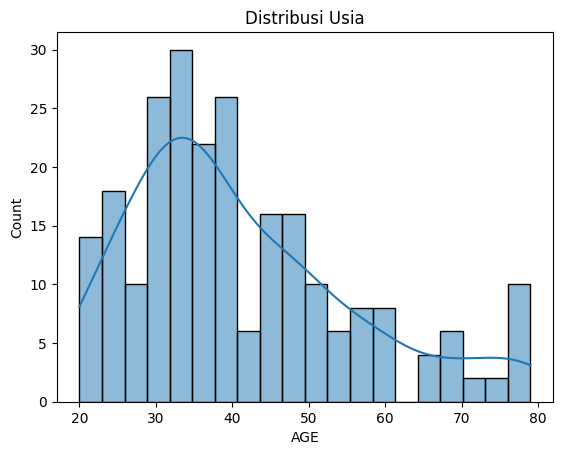

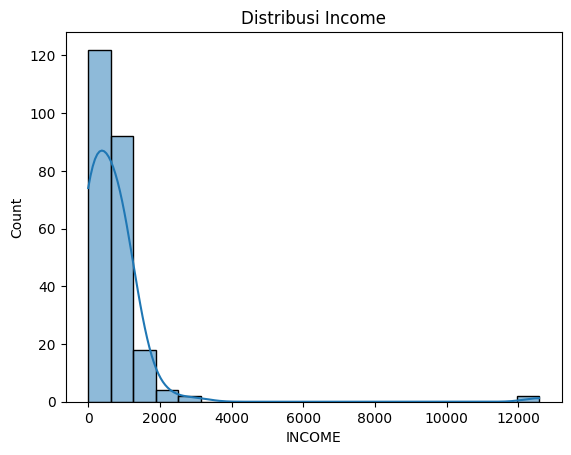

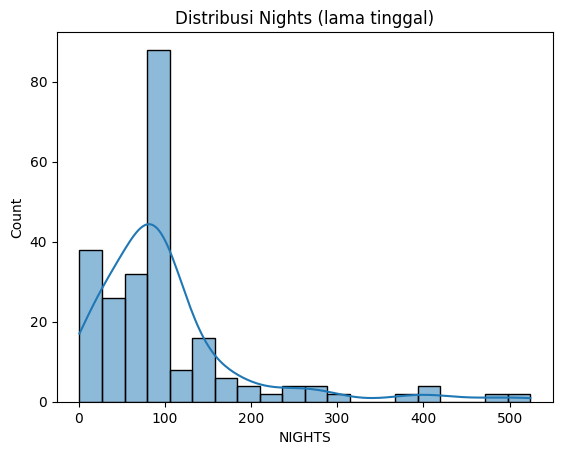

In [ ]:
# 2. Exploratory Data Analysis (EDA)

# === Distribusi Numerik ===
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi umur
sns.histplot(df["AGE"], bins=20, kde=True)
plt.title("Distribusi Usia")
plt.show()

# Distribusi income
sns.histplot(df["INCOME"], bins=20, kde=True)
plt.title("Distribusi Income")
plt.show()

# Lama tinggal
sns.histplot(df["NIGHTS"], bins=20, kde=True)
plt.title("Distribusi Nights (lama tinggal)")
plt.show()


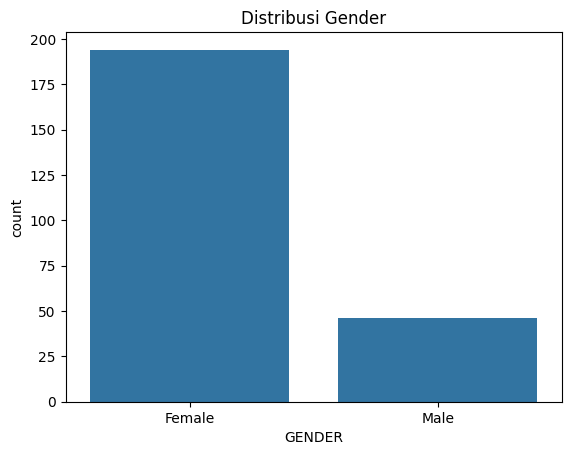

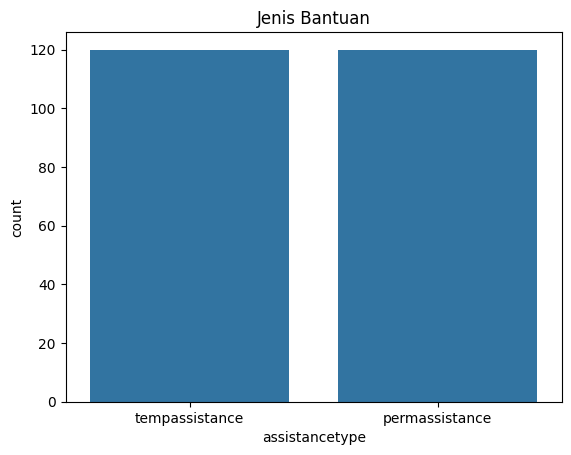

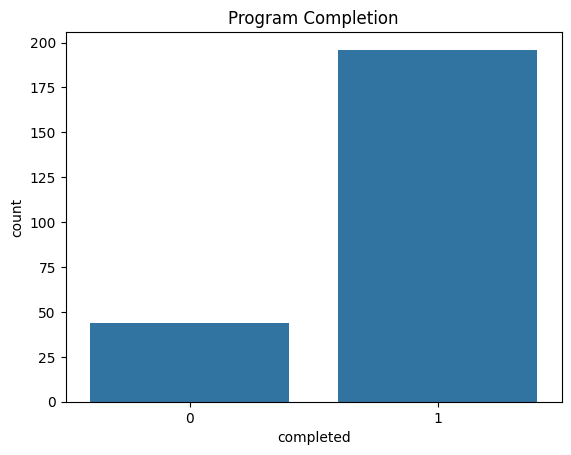

In [ ]:
# === Kategorikal ===

# Gender
sns.countplot(x="GENDER", data=df)
plt.title("Distribusi Gender")
plt.show()

# Assistance type
sns.countplot(x="assistancetype", data=df)
plt.title("Jenis Bantuan")
plt.show()

# Completion
sns.countplot(x="completed", data=df)
plt.title("Program Completion")
plt.show()

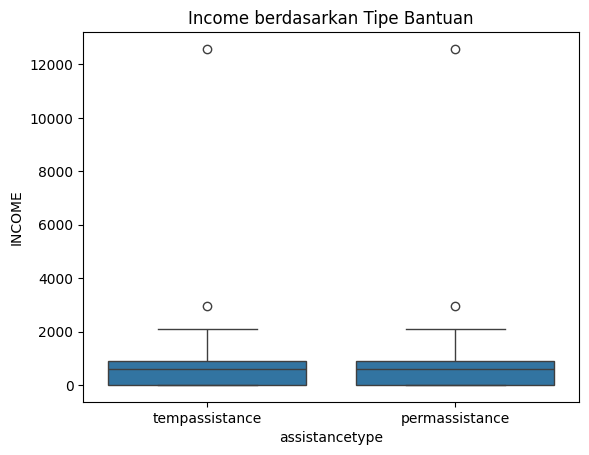

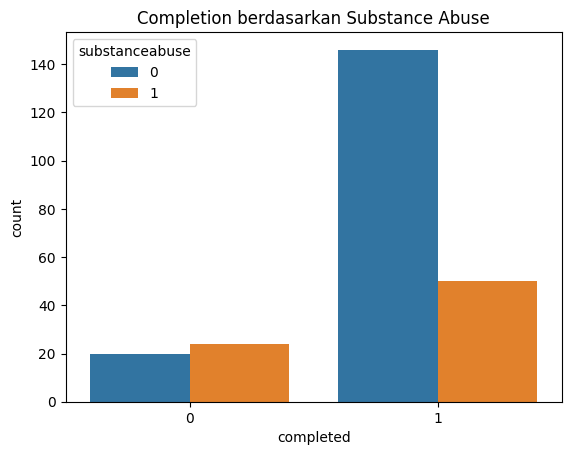

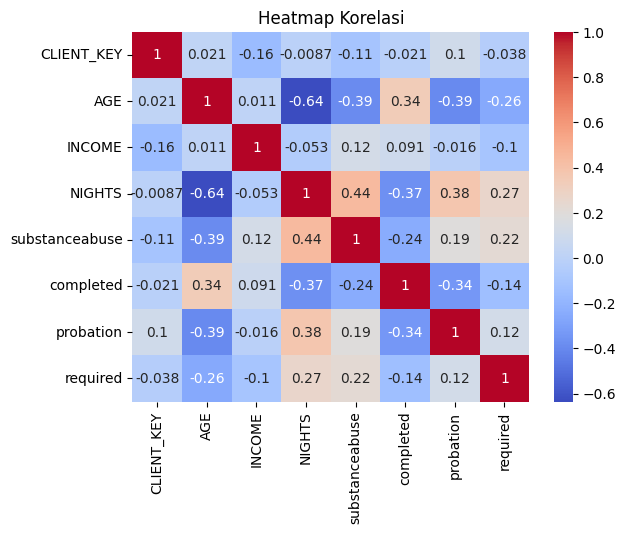

In [ ]:
# === Hubungan Antar Variabel ===

# Boxplot income vs bantuan
sns.boxplot(x="assistancetype", y="INCOME", data=df)
plt.title("Income berdasarkan Tipe Bantuan")
plt.show()

# Substance abuse vs completion
sns.countplot(x="completed", hue="substanceabuse", data=df)
plt.title("Completion berdasarkan Substance Abuse")
plt.show()

# Korelasi numerik
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

/usr/local/lib/python3.12/dist-packages/langchain_experimental/agents/agent_toolkits/pandas/base.py:283: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(


🔹 Pertanyaan: Apa hubungan substance abuse dengan program completion?


> Entering new AgentExecutor chain...
Thought: The question is asking about the relationship between substance abuse and program completion. This can be analyzed by examining the 'substanceabuse' and 'completed' columns in the dataframe. I will use the pandas describe() function to get a statistical summary and groupby() to analyze the relationship between these two columns.

Action: python_repl_ast

Action Input: 
```python
summary = df.groupby('substanceabuse')['completed'].value_counts(normalize=True).describe()
summary
```
count    4.000000
mean     0.500000
std      0.341463
min      0.120482
25%      0.273364
50%      0.500000
75%      0.726636
max      0.879518
Name: proportion, dtype: float64The provided observation does not directly show the relationship between 'substanceabuse' and 'completed'. It provides statistical measures for the proportion of 'completed' for each unique value in 'substanceabuse'. To

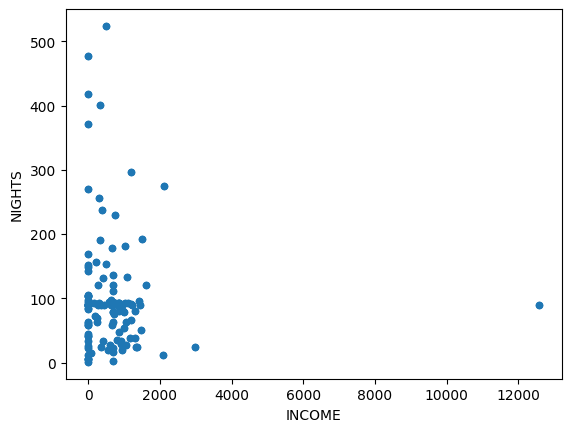

The scatter plot will visually show any potential relationship between income and nights. However, to quantify this relationship, I need to calculate the correlation coefficient.

Action: python_repl_ast

Action Input:
```python
correlation = df['INCOME'].corr(df['NIGHTS'])
correlation
```
-0.052888111087658084The correlation coefficient between 'INCOME' and 'NIGHTS' is -0.052888111087658084. This value is very close to zero, indicating a negligible linear relationship between income and nights.

Final Answer: There is virtually no linear relationship between income and nights, as indicated by the near-zero correlation coefficient (-0.052888111087658084).

> Finished chain.
There is virtually no linear relationship between income and nights, as indicated by the near-zero correlation coefficient (-0.052888111087658084).
------------------------------------------------------------
🔹 Pertanyaan: Siapa yang lebih banyak menyelesaikan program, veteran atau non-veteran?


> Entering new Agen

<string>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<string>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Final Answer: Based on the given dataframe, both veterans and non-veterans have completed the program an equal number of times.

Explanation:
- Veterans (VETERAN = 1) completed the program: `veteran_completions = 1`
- Non-veterans (VETERAN = 0) completed the program: `non_veteran_completions = 1`

Since both counts are equal, neither group has completed the program more than the other.

> Finished chain.
Based on the given dataframe, both veterans and non-veterans have completed the program an equal number of times.

Explanation:
- Veterans (VETERAN = 1) completed the program: `veteran_completions = 1`
- Non-veterans (VETERAN = 0) completed the program: `non_veteran_completions = 1`

Since both counts are equal, neither group has completed the program more than the other.
------------------------------------------------------------
🔹 Pertanyaan: Bantuan apa yang paling sering dipilih oleh klien berpenghasilan rendah?


> Entering new AgentExecutor chain...
Thought: The question is aski

In [ ]:
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain_community.llms import Replicate

# LLM setup (Granite)
llm = Replicate(model="ibm-granite/granite-3.3-8b-instruct")

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,
    handle_parsing_errors=True
)

# Pertanyaan-pertanyaan analisis
questions = [
    "Apa hubungan substance abuse dengan program completion?",
    "Apakah ada hubungan antara income dan nights?",
    "Siapa yang lebih banyak menyelesaikan program, veteran atau non-veteran?",
    "Bantuan apa yang paling sering dipilih oleh klien berpenghasilan rendah?"
]

for q in questions:
    print(f"🔹 Pertanyaan: {q}")
    print(agent.run(q))
    print("-"*60)
